In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

In [4]:

# Display the first few rows
print(df.head())


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [5]:
# Check for missing values
print(df.isnull().sum())

iso_code                                        0
continent                                    8066
location                                        0
date                                            0
total_cases                                  3143
                                            ...  
population                                      1
excess_mortality_cumulative_absolute       137711
excess_mortality_cumulative                137711
excess_mortality                           137711
excess_mortality_cumulative_per_million    137711
Length: 67, dtype: int64


In [6]:

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])


In [7]:

# Filter data for selected countries
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)]


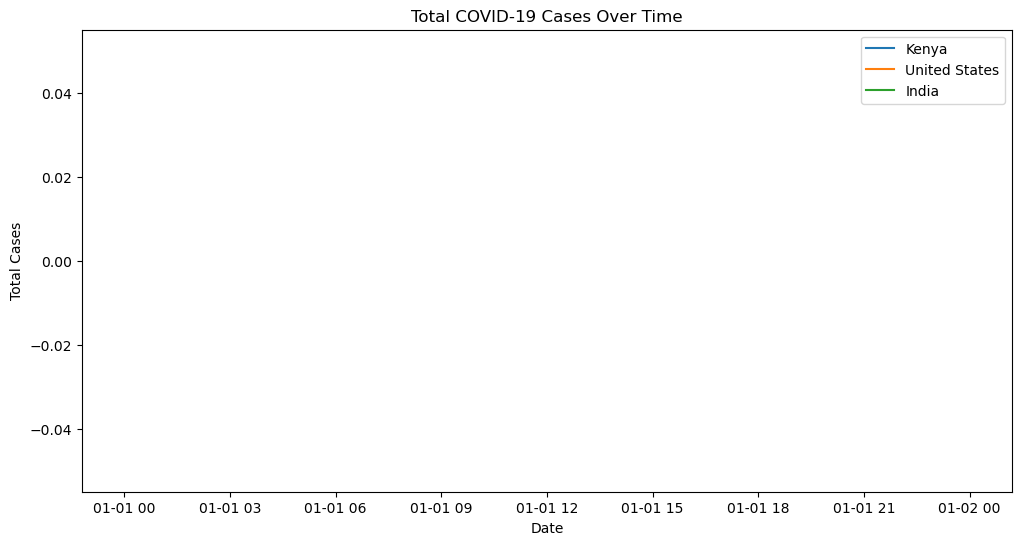

In [8]:

# Plot total cases over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

In [9]:
# Analyze missing values in key columns
missing_values = df[['total_cases', 'total_deaths', 'new_cases', 'new_deaths']].isnull().sum()
print("Missing values in key columns:")
print(missing_values)

Missing values in key columns:
total_cases     3143
total_deaths    3143
new_cases       3940
new_deaths      3940
dtype: int64


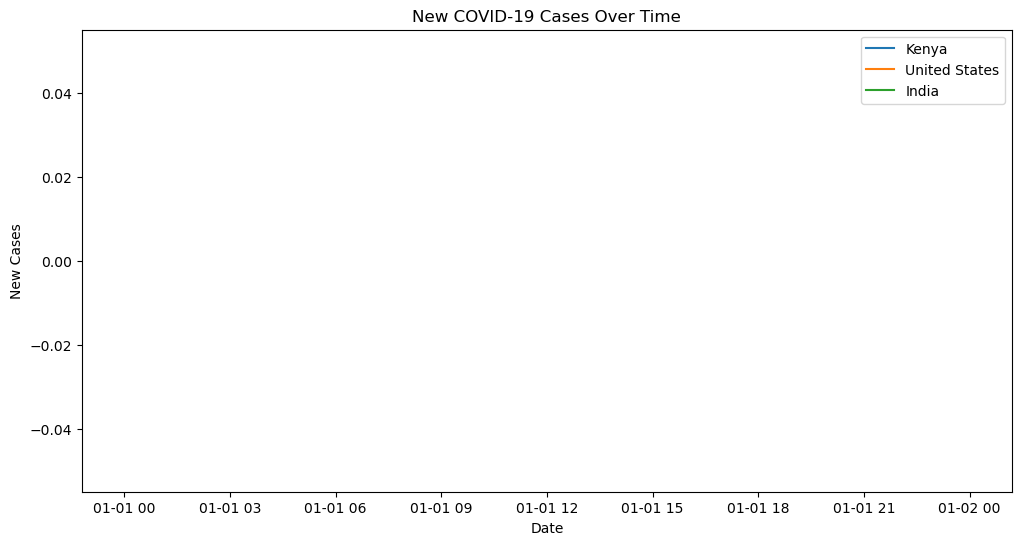

In [10]:
# Plot new cases over time for selected countries
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)
plt.title('New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.show()

In [11]:
# Summary statistics for total cases and total deaths
summary_stats = df_filtered[['location', 'total_cases', 'total_deaths']].groupby('location').max()
print("Summary statistics (maximum values):")
print(summary_stats)

Summary statistics (maximum values):
Empty DataFrame
Columns: [total_cases, total_deaths]
Index: []


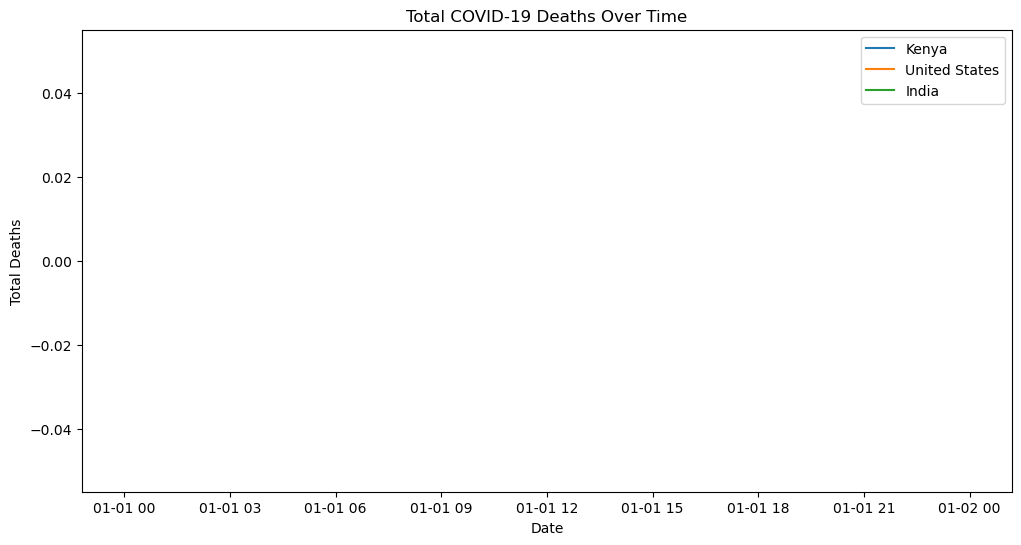

In [12]:
# Plot total deaths over time for selected countries
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()